# Ex 1


**Goal:** Find the stationary distribution $\pi$ for a random walk on a graph.

1. **Stationarity Condition:**
   The stationary distribution $\pi$ must satisfy the equation $\pi = P\pi$. In index notation:
   $$\pi_j = \sum_{i} p_{ji} \pi_i$$
   
2. **Transition Probability:**
   Given $p_{ji} = \frac{A_{ij}}{k_i}$, where $k_i$ is the degree of node $i$:
   $$\pi_j = \sum_{i} \frac{A_{ij}}{k_i} \pi_i$$

3. **Derivation:**
   We guess that the probability is proportional to the degree of the node: $\pi_i = c \cdot k_i$.
   $$\pi_j = \sum_{i} \frac{A_{ij}}{k_i} (c \cdot k_i) = c \sum_{i} A_{ij}$$
   Since $\sum_{i} A_{ij} = k_j$ (sum of neighbors), we get:
   $$\pi_j = c \cdot k_j$$

4. **Normalization:**
   The sum of probabilities must be 1. We know that $\sum k_j = 2|E|$ (twice the number of edges).
   $$\sum_{j} \pi_j = \sum_{j} c \cdot k_j = c \cdot 2|E| = 1 \implies c = \frac{1}{2|E|}$$

5. **Final Formula:**
   $$\pi_i = \frac{k_i}{2|E|}$$

# Ex 2

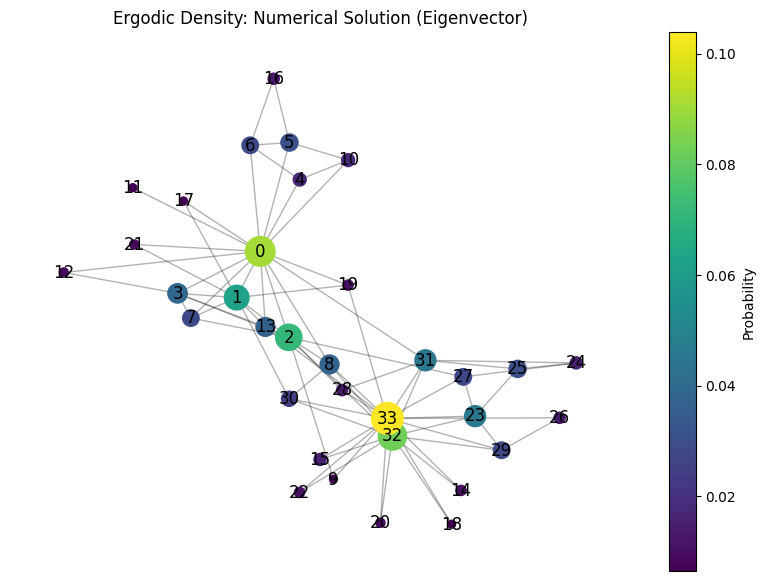

Sample values (Numerical):
Node 0: 0.0909
Node 1: 0.0628
Node 2: 0.0714
Node 3: 0.0390
Node 4: 0.0173


In [6]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# 1. Network Selection (Zachary's Karate Club)
G = nx.karate_club_graph()
n = len(G.nodes)
A = nx.to_numpy_array(G)
degrees = np.sum(A, axis=1)

# 2. Construction of the Transition Matrix P
P = np.zeros((n, n))
for i in range(n):
    if degrees[i] > 0:
        P[:, i] = A[i, :] / degrees[i]

# 3. Numerical Calculations (Eigenvector)
eigenvalues, eigenvectors = np.linalg.eig(P)
idx = np.argmin(np.abs(eigenvalues - 1.0))
pi_numerical = np.real(eigenvectors[:, idx])
pi_numerical = pi_numerical / np.sum(pi_numerical)

# 4. Visualization
plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G, seed=42)

# Draw nodes and capture the output object 'nodes'
nodes = nx.draw_networkx_nodes(G, pos, node_size=pi_numerical * 5000, 
                               node_color=pi_numerical, cmap=plt.cm.viridis)
nx.draw_networkx_edges(G, pos, alpha=0.3)
nx.draw_networkx_labels(G, pos)

# FIX: Use the 'nodes' object directly for the colorbar, 
# or specify ax=plt.gca() if using a manual ScalarMappable.
# Here we use the 'nodes' object which is safer and cleaner:
plt.colorbar(nodes, label="Probability", ax=plt.gca())

plt.title("Ergodic Density: Numerical Solution (Eigenvector)")
plt.axis('off')
plt.show()

print("Sample values (Numerical):")
for i in range(5):
    print(f"Node {i}: {pi_numerical[i]:.4f}")

# Ex 3

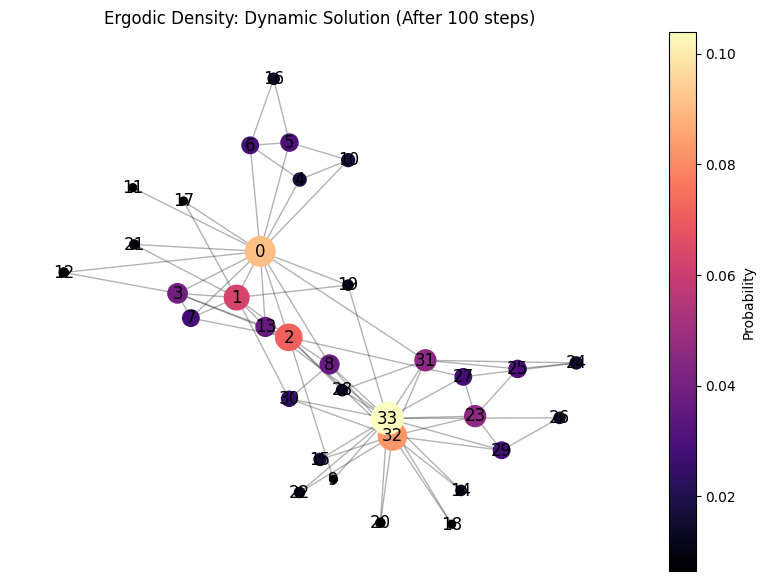

In [11]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# 1. Network Selection and Matrix Setup
G = nx.karate_club_graph()
n = len(G.nodes)
A = nx.to_numpy_array(G)
degrees = np.sum(A, axis=1)

P = np.zeros((n, n))
for i in range(n):
    if degrees[i] > 0:
        P[:, i] = A[i, :] / degrees[i]

# 2. Dynamic Calculations (Iteration)
# Start with a random distribution
v_dynamic = np.random.rand(n)
v_dynamic = v_dynamic / np.sum(v_dynamic) # Initial normalization

steps = 100
for t in range(steps):
    v_dynamic = P @ v_dynamic # Matrix multiplication v(t+1) = P * v(t)

# 3. Visualization
plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G, seed=42)

# Draw nodes
nodes = nx.draw_networkx_nodes(G, pos, node_size=v_dynamic * 5000, 
                               node_color=v_dynamic, cmap=plt.cm.magma)
nx.draw_networkx_edges(G, pos, alpha=0.3)
nx.draw_networkx_labels(G, pos)
norm = plt.Normalize(vmin=v_dynamic.min(), vmax=v_dynamic.max())

# 2. Create the ScalarMappable
sm = plt.cm.ScalarMappable(cmap=plt.cm.magma, norm=norm)
sm.set_array([]) # This is an empty array required by older versions of Matplotlib

# 3. Add colorbar, explicitly telling it to steal space from the current axes (ax=plt.gca())
plt.colorbar(sm, ax=plt.gca(), label="Probability")
# --------------------

plt.title(f"Ergodic Density: Dynamic Solution (After {steps} steps)")
plt.axis('off')
plt.show()

# Comparison

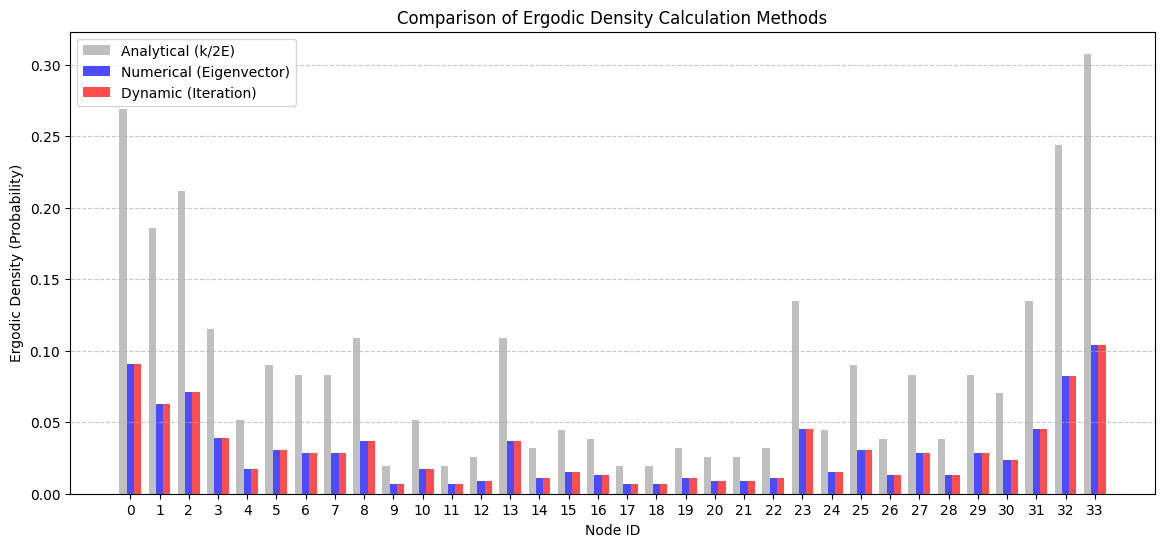

Max Error (Numerical vs Analytical): 2.04e-01
Max Error (Dynamic vs Analytical): 2.04e-01


In [12]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# --- Setup Data for Comparison ---

# Network Data
G = nx.karate_club_graph()
n = len(G.nodes)
m_edges = G.number_of_edges()
A = nx.to_numpy_array(G)
degrees = np.sum(A, axis=1)

# Transition Matrix P
P = np.zeros((n, n))
for i in range(n):
    if degrees[i] > 0: 
        P[:, i] = A[i, :] / degrees[i]

# 1. Analytical Solution (Formula: k_i / 2E)
pi_analytical = degrees / (2 * m_edges)

# 2. Numerical Solution (Eigenvector)
vals, vecs = np.linalg.eig(P)
idx = np.argmin(np.abs(vals - 1.0))
pi_numerical = np.real(vecs[:, idx])
pi_numerical /= np.sum(pi_numerical)

# 3. Dynamic Solution (Iteration)
pi_dynamic = np.random.rand(n)
pi_dynamic /= np.sum(pi_dynamic)
for _ in range(100):
    pi_dynamic = P @ pi_dynamic

# --- Visualization of Comparison ---
nodes = np.arange(n)
width = 0.25

plt.figure(figsize=(14, 6))
plt.bar(nodes - width, pi_analytical, width, label='Analytical (k/2E)', color='gray', alpha=0.5)
plt.bar(nodes, pi_numerical, width, label='Numerical (Eigenvector)', color='blue', alpha=0.7)
plt.bar(nodes + width, pi_dynamic, width, label='Dynamic (Iteration)', color='red', alpha=0.7)

plt.xlabel('Node ID')
plt.ylabel('Ergodic Density (Probability)')
plt.title('Comparison of Ergodic Density Calculation Methods')
plt.legend()
plt.xticks(nodes)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Error Calculation
err_num = np.max(np.abs(pi_numerical - pi_analytical))
err_dyn = np.max(np.abs(pi_dynamic - pi_analytical))
print(f"Max Error (Numerical vs Analytical): {err_num:.2e}")
print(f"Max Error (Dynamic vs Analytical): {err_dyn:.2e}")

# Ex 5

In [14]:
import networkx as nx

# 1. Load the Network
G = nx.karate_club_graph()

# 2. Classic PageRank (d=0.85)
# This includes the "teleportation" chance (1-d)
pr_classic = nx.pagerank(G, alpha=0.85)

# 3. Modified / Undamped PageRank (d=1.0)
# This is a pure random walk (Stationary Distribution)
pr_modified = nx.pagerank(G, alpha=1.0)

# Print comparison for the top node (Node 33)
node_id = 33
print(f"Node {node_id} Classic:  {pr_classic[node_id]:.4f}")
print(f"Node {node_id} Modified: {pr_modified[node_id]:.4f}")
node_id = 0
print(f"Node {node_id} Classic:  {pr_classic[node_id]:.4f}")
print(f"Node {node_id} Modified: {pr_modified[node_id]:.4f}")
node_id = 24
print(f"Node {node_id} Classic:  {pr_classic[node_id]:.4f}")
print(f"Node {node_id} Modified: {pr_modified[node_id]:.4f}")

Node 33 Classic:  0.0970
Node 33 Modified: 0.1039
Node 0 Classic:  0.0885
Node 0 Modified: 0.0909
Node 24 Classic:  0.0166
Node 24 Modified: 0.0151


# Ex 6 - Ramanujan Graph

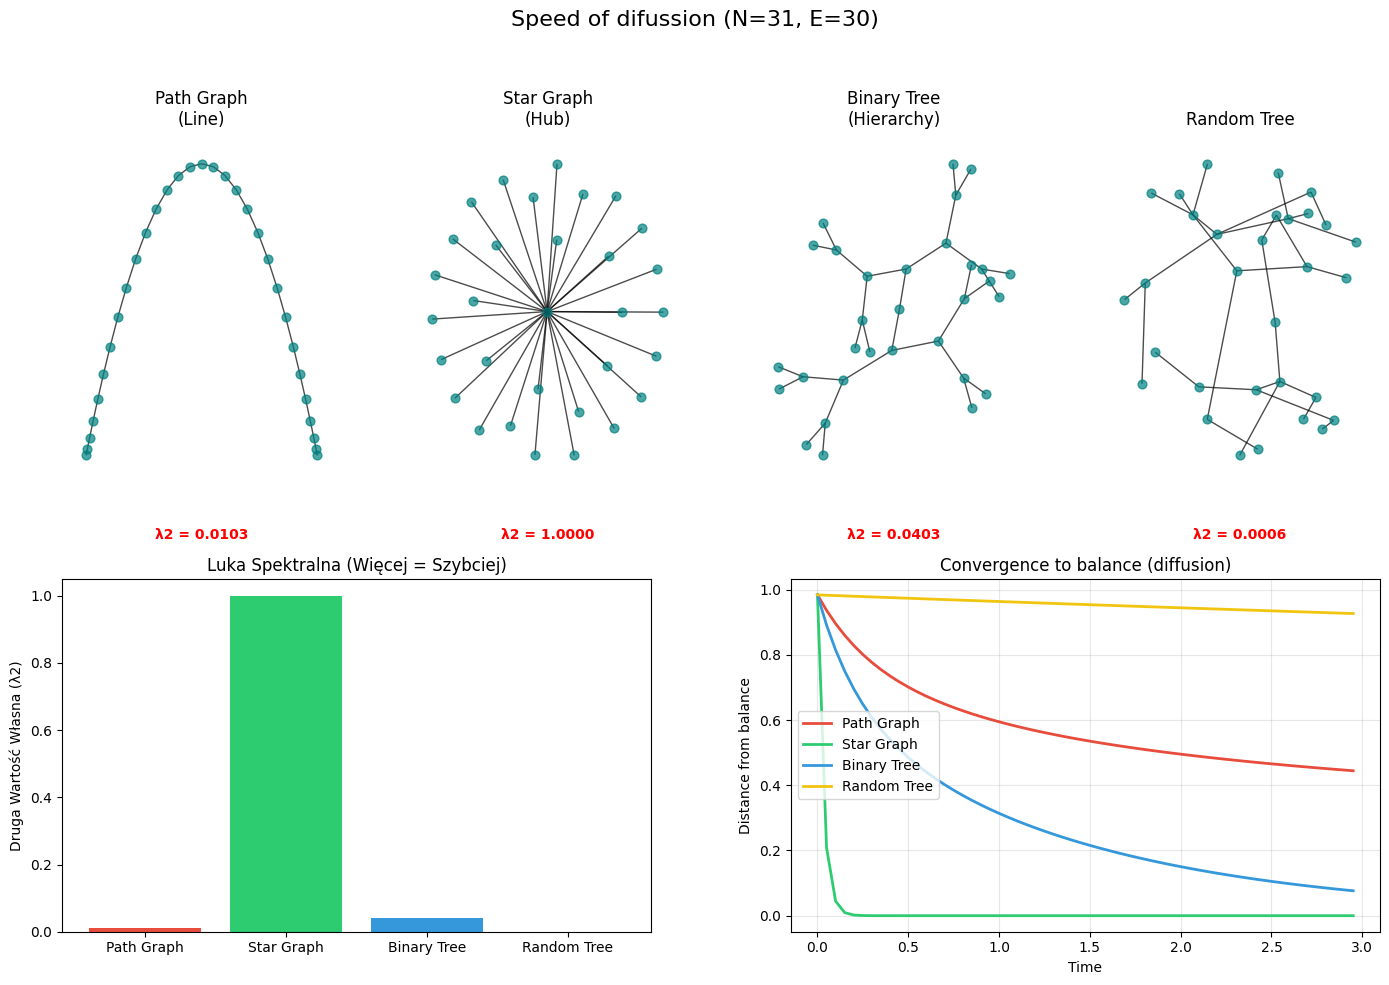

In [16]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# --- KONFIGURACJA ---
N = 31  # Liczba wierzchołków (pasuje do pełnego drzewa binarnego)
graphs = []
labels = []

# 1. Graf Ścieżki (Path Graph) - "Długa i cienka struktura"
# Najdłuższa możliwa droga między węzłami.
g1 = nx.path_graph(N)
graphs.append(g1)
labels.append("Path Graph\n(Line)")

# 2. Graf Gwiazdy (Star Graph) - "Scentralizowana struktura"
# Jeden węzeł połączony ze wszystkimi. Najkrótsza średnica.
g2 = nx.star_graph(N-1)
graphs.append(g2)
labels.append("Star Graph\n(Hub)")

# 3. Drzewo Binarne (Binary Tree) - "Struktura hierarchiczna"
# Kompromis między ścieżką a gwiazdą.
g3 = nx.balanced_tree(2, 4) # Głębokość 4 daje 31 węzłów
graphs.append(g3)
labels.append("Binary Tree\n(Hierarchy)")

# 4. Drzewo Losowe (Random Tree) - "Struktura nieuporządkowana"
# Generowane jako losowe drzewo rozpinające.
G_complete = nx.complete_graph(N)
np.random.seed(42) # Dla powtarzalności
for (u, v) in G_complete.edges():
    G_complete.edges[u,v]['weight'] = np.random.rand()
g4 = nx.minimum_spanning_tree(G_complete)
graphs.append(g4)
labels.append("Random Tree")

# --- OBLICZENIA (Wartości Własne) ---
lambda2_values = []
for G in graphs:
    L = nx.laplacian_matrix(G).toarray()
    evals = np.linalg.eigvalsh(L)
    evals.sort()
    lambda2_values.append(evals[1]) # Druga najmniejsza wartość własna

# --- SYMULACJA DYFUZJI ---
# Rozchodzenie się ciepła od węzła 0
steps = 60
times = np.arange(steps) * 0.05
diffusion_data = []

phi_0 = np.zeros(N)
phi_0[0] = 1.0 # Cała "energia" na początku w jednym węźle

for G in graphs:
    L = nx.laplacian_matrix(G).toarray()
    evals, V = np.linalg.eigh(L)
    coeffs = V.T @ phi_0
    
    dist_over_time = []
    for t in times:
        phi_t = V @ (coeffs * np.exp(-evals * t))
        # Odległość od stanu równowagi (gdzie energia jest równo rozłożona = 1/N)
        dist = np.linalg.norm(phi_t - (1/N))
        dist_over_time.append(dist)
    diffusion_data.append(dist_over_time)

# --- WIZUALIZACJA ---
fig = plt.figure(figsize=(14, 10))
plt.suptitle(f"Speed of difussion (N={N}, E={N-1})", fontsize=16)

# Wiersz 1: Wygląd grafów
for i in range(4):
    ax = plt.subplot(2, 4, i+1)
    pos = nx.spring_layout(graphs[i], seed=42)
    if i == 1: pos = nx.spring_layout(graphs[i]) # Gwiazda
    if i == 0: pos = nx.spectral_layout(graphs[i]) # Ścieżka
    
    nx.draw(graphs[i], pos, node_size=40, node_color='teal', alpha=0.7, ax=ax)
    ax.set_title(f"{labels[i]}")
    ax.text(0.5, -0.15, f"λ2 = {lambda2_values[i]:.4f}", 
            transform=ax.transAxes, ha='center', color='red', weight='bold')

# Wiersz 2 (Lewo): Wykres słupkowy Lambda 2
ax_bar = plt.subplot(2, 2, 3)
colors = ['#e74c3c', '#2ecc71', '#3498db', '#f1c40f']
bars = ax_bar.bar([l.split('\n')[0] for l in labels], lambda2_values, color=colors)
ax_bar.set_ylabel("Druga Wartość Własna (λ2)")
ax_bar.set_title("Luka Spektralna (Więcej = Szybciej)")

# Wiersz 2 (Prawo): Krzywe dyfuzji
ax_diff = plt.subplot(2, 2, 4)
for i in range(4):
    ax_diff.plot(times, diffusion_data[i], label=labels[i].split('\n')[0], 
                 linewidth=2, color=colors[i])

ax_diff.set_title("Convergence to balance (diffusion)")
ax_diff.set_xlabel("Time")
ax_diff.set_ylabel("Distance from balance")
ax_diff.legend()
ax_diff.grid(True, alpha=0.3)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()